In [1]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn

In [3]:
advertising = pd.read_csv('data/advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertising.shape

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


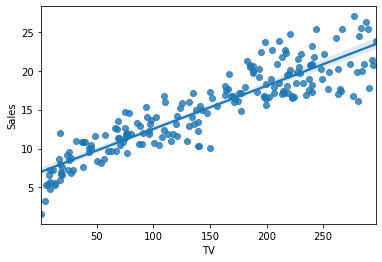

In [8]:
sns.regplot(x='TV', y='Sales', data=advertising)
plt.show()

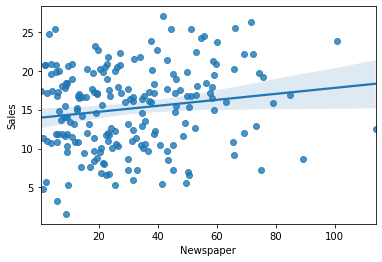

In [9]:
sns.regplot(x='Newspaper', y='Sales', data=advertising)
plt.show()

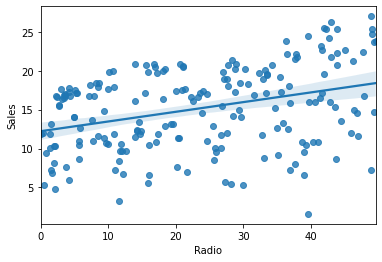

In [10]:
sns.regplot(x='Radio', y='Sales', data=advertising)
plt.show()

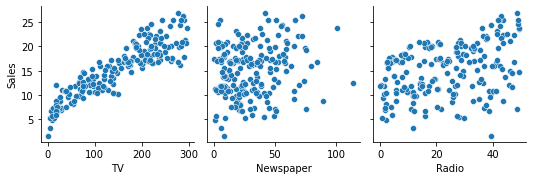

In [13]:
sns.pairplot(data=advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',diag_kind=None)
plt.show()

In [14]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


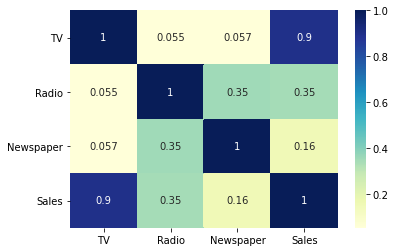

In [20]:
sns.heatmap(advertising.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [22]:
X = advertising['TV']
y = advertising['Sales']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:
import statsmodels.api as sm

In [26]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [27]:
lr.params

const    7.206555
TV       0.054835
dtype: float64

In [28]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     550.7
Date:                Wed, 21 Jul 2021   Prob (F-statistic):           5.08e-50
Time:                        21:15:22   Log-Likelihood:                -314.94
No. Observations:                 140   AIC:                             633.9
Df Residuals:                     138   BIC:                             639.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2066      0.414     17.392      0.0

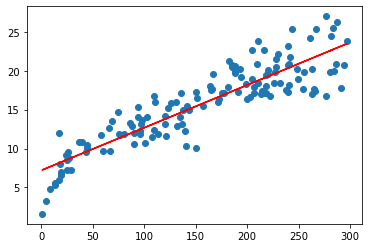

In [32]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 7.2066+0.0548*X_train, 'r')
plt.show()

In [33]:
y_train_pred = lr.predict(X_train_sm)
y_train_pred

169    22.796112
97     17.345525
31     13.397413
12      8.511625
35     23.147055
         ...    
106     8.577427
14     18.398354
92     19.144109
179    16.287211
102    22.571289
Length: 140, dtype: float64

In [34]:
res = y_train - y_train_pred

Text(0.5, 1.0, 'Residual Plot')

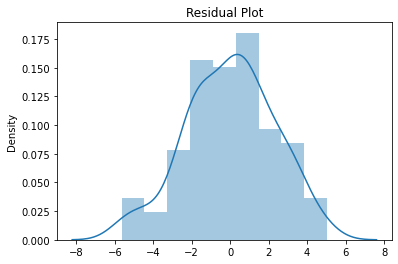

In [35]:
plt.figure()
sns.distplot(res)
plt.title('Residual Plot')

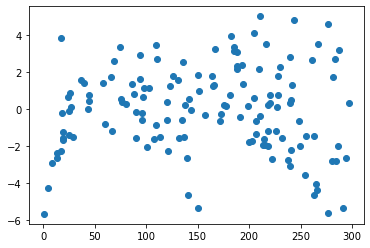

In [36]:
plt.scatter(X_train,res)
plt.show()

In [37]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [39]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.27585706980176

In [40]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.814855389208679

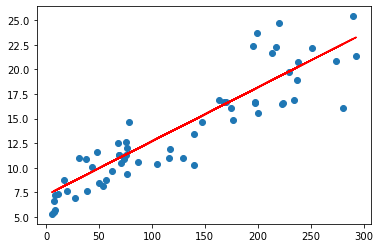

In [41]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 7.2066+0.0548* X_test, 'r')
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [44]:
X_train_lm.shape

(140,)

In [46]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [47]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [48]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [49]:
print(lm.intercept_)
print(lm.coef_)

7.206554548173253
[0.05483488]


In [50]:
corrs = np.corrcoef(X_train, y_train)
print(corrs)

[[1.         0.89421861]
 [0.89421861 1.        ]]


In [51]:
corrs[0,1] ** 2

0.7996269282192676